In [2]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [122]:
# Baixa os dados e cria um DataFrame com os dados de treino (esses dados contem os parâmetro e o resultado)
df_treino = pd.read_csv('https://raw.githubusercontent.com/barbosa-adriano/diabetes_prediction_example/main/train.csv')

In [123]:
# Visualiza o cabeçalho e as 10 primeiras linhas do DataFrame
df_treino.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Id
0,1,85,66,29,0,26.6,0.351,31,0,1
1,1,89,66,23,94,28.1,0.167,21,0,3
2,5,116,74,0,0,25.6,0.201,30,0,5
3,10,115,0,0,0,35.3,0.134,29,0,7
4,2,197,70,45,543,30.5,0.158,53,1,8
5,8,125,96,0,0,0.0,0.232,54,1,9
6,4,110,92,0,0,37.6,0.191,30,0,10
7,10,168,74,0,0,38.0,0.537,34,1,11
8,10,139,80,0,0,27.1,1.441,57,0,12
9,1,189,60,23,846,30.1,0.398,59,1,13


In [124]:
# Baixa os dados e cria um DataFrame com os dados de teste (esses dados contem os parâmetros SEM o resultado)
df_test = pd.read_csv('https://raw.githubusercontent.com/barbosa-adriano/diabetes_prediction_example/main/test.csv')

In [125]:
# Visualiza o cabeçalho e as 10 primeiras linhas do DataFrame
df_test.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Id
0,6,148,72,35,0,33.6,0.627,50,0
1,8,183,64,0,0,23.3,0.672,32,2
2,0,137,40,35,168,43.1,2.288,33,4
3,3,78,50,32,88,31.0,0.248,26,6
4,7,100,0,0,0,30.0,0.484,32,15
5,1,103,30,38,83,43.3,0.183,33,18
6,3,126,88,41,235,39.3,0.704,27,20
7,7,196,90,0,0,39.8,0.451,41,22
8,3,180,64,25,70,34.0,0.271,26,40
9,7,133,84,0,0,40.2,0.696,37,41


In [126]:
# Baixa os dados e cria um DataFrame com os dados de teste (esses dados contem SOMENTE o resultado)
df_resposta = pd.read_csv('https://raw.githubusercontent.com/barbosa-adriano/diabetes_prediction_example/main/answer_key.csv')

In [127]:
# Visualiza o cabeçalho e as 10 primeiras linhas do DataFrame
df_resposta.head(10)

,Id,Outcome
0,0,1
1,2,1
2,4,1
3,6,1
4,15,1
5,18,0
6,20,0
7,22,1
8,40,0
9,41,0


In [128]:
# Como os dados de teste estavam separados (parâmetros em um DataFrame e o resultado em outro) porém em ambos os DataFrames existe o Id que liga as informações
# assim será criado um novo DataFrame com os parametros e seus resultados correspondentes
df_testRes = df_test.join(df_resposta.set_index('Id'), on='Id')

In [129]:
# Visualiza o cabeçalho e as 10 primeiras linhas do DataFrame
df_testRes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Id,Outcome
0,6,148,72,35,0,33.6,0.627,50,0,1
1,8,183,64,0,0,23.3,0.672,32,2,1
2,0,137,40,35,168,43.1,2.288,33,4,1
3,3,78,50,32,88,31.0,0.248,26,6,1
4,7,100,0,0,0,30.0,0.484,32,15,1
5,1,103,30,38,83,43.3,0.183,33,18,0
6,3,126,88,41,235,39.3,0.704,27,20,0
7,7,196,90,0,0,39.8,0.451,41,22,1
8,3,180,64,25,70,34.0,0.271,26,40,0
9,7,133,84,0,0,40.2,0.696,37,41,0


In [130]:
# Exibe as análises dos parâmetros para visualizarmos a dispersão dos dados, assim temos uma idéia de qual o melhor algoritmo para aplicar no treinamento da máquina
sns.pairplot(df_treino[df_treino.columns.drop('Id')].corr(), hue='Outcome')

Error in callback <function flush_figures at 0x7fdf4fa1f440> (for post_execute):


KeyboardInterrupt: ignored

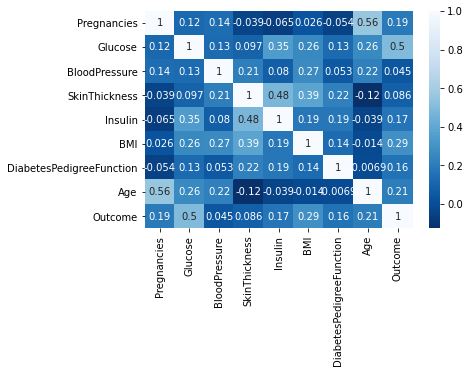

In [131]:
# Exibe as análises dos parâmetros para visualizarmos a um gráfico de calor dos dados, assim temos uma idéia de quais parâmetros tem a maior co-relação entre eles
sns.heatmap(df_treino[df_treino.columns.drop('Id')].corr(),annot = True,cmap='Blues_r')

In [132]:
# Troca todos os dados zerados para NaN (Not a Number que é igual a Nulo)
# Desta forma conseguimos separar esses dados que não poderiam estar zerados em um tipo de informação que podemos substituir por um valor válido depois
df_treino['Glucose'] = df_treino['Glucose'].replace(0, np.nan)
df_treino['BloodPressure'] = df_treino['BloodPressure'].replace(0, np.nan) 
df_treino['SkinThickness'] = df_treino['SkinThickness'].replace(0, np.nan) 
df_treino['Insulin'] = df_treino['Insulin'].replace(0, np.nan)        
df_treino['BMI'] = df_treino['BMI'].replace(0, np.nan) 
df_treino['DiabetesPedigreeFunction'] = df_treino['DiabetesPedigreeFunction'].replace(0, np.nan) 
df_treino['Age'] = df_treino['Age'].replace(0, np.nan) 

In [94]:
# Visualiza o cabeçalho e as 10 primeiras linhas do DataFrame
df_treino.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Id
0,1,85,66,29,0,26.6,0.351,31,0,1
1,1,89,66,23,94,28.1,0.167,21,0,3
2,5,116,74,0,0,25.6,0.201,30,0,5
3,10,115,0,0,0,35.3,0.134,29,0,7
4,2,197,70,45,543,30.5,0.158,53,1,8
5,8,125,96,0,0,0.0,0.232,54,1,9
6,4,110,92,0,0,37.6,0.191,30,0,10
7,10,168,74,0,0,38.0,0.537,34,1,11
8,10,139,80,0,0,27.1,1.441,57,0,12
9,1,189,60,23,846,30.1,0.398,59,1,13


In [133]:
# Agora é possível verificar quantos parâmetros estão incorretos (agora estão como Nulos)
df_treino.isnull().sum()

Pregnancies                   0
Glucose                       2
BloodPressure                24
SkinThickness               171
Insulin                     269
BMI                           8
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
Id                            0
dtype: int64

In [134]:
# Após isso vamos substituir os valores nulos pela Mediana do dados
df_treino['BMI'].fillna(df_treino['BMI'].median(), inplace=True)
df_treino['Glucose'].fillna(df_treino['Glucose'].median(), inplace=True)
df_treino['BloodPressure'].fillna(df_treino['BloodPressure'].median(), inplace=True)
df_treino['SkinThickness'].fillna(df_treino['SkinThickness'].median(), inplace=True)
df_treino['Insulin'].fillna(df_treino['Insulin'].median(), inplace=True)

In [96]:
# Visualiza o cabeçalho e as 10 primeiras linhas do DataFrame
# Agora todos os dados estão corretos
df_treino.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Id
0,1,85,66,29,0,26.6,0.351,31,0,1
1,1,89,66,23,94,28.1,0.167,21,0,3
2,5,116,74,0,0,25.6,0.201,30,0,5
3,10,115,0,0,0,35.3,0.134,29,0,7
4,2,197,70,45,543,30.5,0.158,53,1,8
5,8,125,96,0,0,0.0,0.232,54,1,9
6,4,110,92,0,0,37.6,0.191,30,0,10
7,10,168,74,0,0,38.0,0.537,34,1,11
8,10,139,80,0,0,27.1,1.441,57,0,12
9,1,189,60,23,846,30.1,0.398,59,1,13


In [135]:
# Cria os DataFrames para treinamento das máquinas, o X_treino contém os parâmetros e o y_treino contém somente os resultados (Outcome)
X_treino = df_treino.drop(['Id', 'Outcome'], axis=1)
y_treino = df_treino['Outcome']

In [ ]:
# Utilizar somente 1 melhorador de dados, abaixo tem o Standard e o MinMax

In [136]:
# Faz o pré-processamento dos dados para que os valores não fiquem tão distantes (ele faz um cálculo para diminuir os valores proporcionalmente)
# Esse tratamento deve ser feito nos PARÂMENTROS de Treino e de Teste que serão usados na máquina de aprendizado
from sklearn.preprocessing import StandardScaler
X_treino = StandardScaler().fit_transform(X_treino)

X_treino

array([[-8.81062218e-01, -1.24859926e+00, -5.47286076e-01, ...,
        -8.49854560e-01, -3.61460867e-01, -2.15135027e-01],
       [-8.81062218e-01, -1.11358902e+00, -5.47286076e-01, ...,
        -6.28824324e-01, -9.36887006e-01, -1.04548074e+00],
       [ 2.80313983e-01, -2.02269889e-01,  1.23856269e-01, ...,
        -9.97208051e-01, -8.30558263e-01, -2.98169599e-01],
       ...,
       [ 1.73203424e+00, -7.08558294e-01,  2.91641855e-01, ...,
         7.84724317e-02, -9.24377742e-01,  2.44197127e+00],
       [-5.90718168e-01,  2.45473166e-04, -2.11714903e-01, ...,
         6.53151045e-01, -3.95861342e-01, -5.47273314e-01],
       [-8.81062218e-01,  1.35255715e-01, -1.05064283e+00, ...,
        -3.34117342e-01, -3.67715498e-01,  1.11341812e+00]])

In [63]:
# Faz o pré-processamento dos dados para que os valores não fiquem tão distantes (ele faz um cálculo para deixar o valor na mediana entre o maior e menor)
# Esse tratamento deve ser feito nos PARÂMENTROS de Treino e de Teste que serão usados na máquina de aprendizado
from sklearn.preprocessing import MinMaxScaler
X_treino = MinMaxScaler().fit_transform(X_treino)

X_treino

array([[0.05882353, 0.26797386, 0.28205128, ..., 0.2038835 , 0.11656704,
        0.16666667],
       [0.05882353, 0.29411765, 0.28205128, ..., 0.24029126, 0.03800171,
        0.        ],
       [0.29411765, 0.47058824, 0.38461538, ..., 0.17961165, 0.05251921,
        0.15      ],
       ...,
       [0.58823529, 0.37254902, 0.41025641, ..., 0.35679612, 0.03970965,
        0.7       ],
       [0.11764706, 0.50980392, 0.33333333, ..., 0.45145631, 0.1118702 ,
        0.1       ],
       [0.05882353, 0.53594771, 0.20512821, ..., 0.28883495, 0.11571307,
        0.43333333]])

In [137]:
# Cria os DataFrames para validação (teste) das máquinas, o X_test contém os parâmetros e o y_test contém somente os resultados (Outcome)
X_test = df_testRes.drop(['Id','Outcome'], axis=1)
y_test = df_testRes['Outcome']

In [138]:
# Faz o pré-processamento dos dados para que os valores não fiquem tão distantes (ele faz um cálculo para diminuir os valores proporcionalmente)
# Esse tratamento deve ser feito nos PARÂMENTROS de Treino e de Teste que serão usados na máquina de aprendizado

from sklearn.preprocessing import StandardScaler
X_test = StandardScaler().fit_transform(X_test)

X_test

array([[ 0.84540575,  0.8167232 ,  0.17850279, ...,  0.17164149,
         0.39621064,  1.61328001],
       [ 1.48756064,  1.80980655, -0.21908196, ..., -1.11047362,
         0.52197755, -0.03271863],
       [-1.08105892,  0.50461129, -1.4118362 , ...,  1.35417485,
         5.03840701,  0.05872574],
       ...,
       [ 0.84540575,  2.00842322,  1.17246465, ...,  0.40814816,
        -0.57918162,  3.07638992],
       [ 0.52432831,  0.05063033,  0.17850279, ..., -0.74948976,
        -0.67141069, -0.21560737],
       [-0.75998148, -0.74383635,  0.0791066 , ..., -0.22668554,
        -0.47577327, -0.85571795]])

In [101]:
# Faz o pré-processamento dos dados para que os valores não fiquem tão distantes (ele faz um cálculo para deixar o valor na mediana entre o maior e menor)
# Esse tratamento deve ser feito nos PARÂMENTROS de Treino e de Teste que serão usados na máquina de aprendizado
from sklearn.preprocessing import MinMaxScaler
X_test = MinMaxScaler().fit_transform(X_test)

X_test

array([[0.42857143, 0.74371859, 0.65454545, ..., 0.50074516, 0.24051763,
        0.64444444],
       [0.57142857, 0.91959799, 0.58181818, ..., 0.34724292, 0.26059795,
        0.24444444],
       [0.        , 0.68844221, 0.36363636, ..., 0.64232489, 0.9817046 ,
        0.26666667],
       ...,
       [0.42857143, 0.95477387, 0.83636364, ..., 0.5290611 , 0.08478358,
        1.        ],
       [0.35714286, 0.6080402 , 0.65454545, ..., 0.390462  , 0.07005801,
        0.2       ],
       [0.07142857, 0.46733668, 0.63636364, ..., 0.45305514, 0.10129407,
        0.04444444]])

In [7]:
# Cria um DataFrame em branco para armazenar os dados de acuracia
accurac_df = pd.DataFrame(columns=['MachineType','Accuracy'])
#accurac_df = pd.DataFrame([''])

In [140]:
# Cria e parametriza a maquina de aprendizado utilizando o algoritimo SVM do Tipo Linar
# Definição do algoritimo: O SVM é um algoritmo de aprendizado supervisionado linear, 
# que é utilizado na classificação de um conjunto de pontos onde busca uma linha de separação entre duas classes distintas, 
# o SVM escolhe a reta entre eles — também chamada de hiperplano em maiores dimensões. 
# Daí a partir dos novos dados ele agrupa em qual das duas classificações faz mais sentido.
# https://pt.wikipedia.org/wiki/M%C3%A1quina_de_vetores_de_suporte

c = 0.1 # param regularização
clf_svc = SVC(C=c, kernel='linear')  # Informa o tipo da curva de separação, nesse caso será LINEAR (que é uma linha reta separando os conjuntos de dados)

# Treina o classificador utilizado os DataFrames de treino, onde o X_treino contém os parâmetros e o y_treino contém os resultados
clf_svc.fit(X_treino, y_treino)

# Gera um array com os resultados cálculados pela Máquina de Treinamento utilizando o X_Test como parâmetro
y_pred_svc = clf_svc.predict(X_test)

In [157]:
# Cálcula a acurária utilizando o y_teste que é o resultado do X_test comparando com o y_pred_ que são os resultados que a máquina gerou
accu_svc = accuracy_score(y_test, y_pred_svc)

In [164]:
# Armazena o valor de acurácia no DataFrame
accurac_df.append({'MachineType':'Support Vector Machine-LINEAR','Accuracy': accu_svc}, ignore_index=True)

In [143]:
#Armazena os resultados dos dados utilizados para Teste e os gerados pela Máquina no DataFrame criado para comparação
resp_df = pd.DataFrame(data={'actual': y_test, 'pred_linear': y_pred_svc})
resp_df

,actual,pred_linear
0,1,1
1,1,1
2,1,1
3,1,0
4,1,0
...,...,...
213,1,0
214,0,0
215,1,1
216,0,0


In [165]:
# Definição do algoritimo: Na máquina RBF, diferentemente do kernel linear, é possível resolver problemas, 
# originalmente, não linearmente separáveis, através do mapeamento para um espaço de maior  dimensão. 
# https://www.cin.ufpe.br/~tg/2010-2/gmoj.pdf

# Mudando o kernel para função Não-Linear
c = 1.0 # param regularização
clf_svc_rbf = SVC(C=c, kernel='rbf', gamma='auto') # Informa o tipo da curva de separação, nesse caso será RBF (que é uma separação de conjuntos de dados não separaveis linearmente)
clf_svc_rbf.fit(X_treino, y_treino) # passa os dados de treino, X são os parâmetros e y os resultados
y_pred_rbf = clf_svc_rbf.predict(X_test) # gera uma predição de resultados com base nos parâmetros de teste
accu_rbf = accuracy_score(y_test, y_pred_rbf) # mede a acuracia do modelo (precisão)

accurac_df.append({'MachineType':'Support Vector Machine-RBF','Accuracy': accu_rbf}, ignore_index=True) # Armazena o valor de acurácia no DataFrame
accu_rbf

0.7660550458715596

In [145]:
resp_df['pred_rbf'] = y_pred_rbf # inclui os dados preditos no DataFrame de resultados por modelo
resp_df

,actual,pred_linear,pred_rbf
0,1,1,1
1,1,1,1
2,1,1,1
3,1,0,0
4,1,0,0
...,...,...,...
213,1,0,0
214,0,0,0
215,1,1,1
216,0,0,0


In [146]:
# Mudando o kernel para função Não-Linear
c = 1.0 # param regularização
clf_svc_poly = SVC(C=c, kernel='poly', degree=4) # Informa o tipo da curva de separação, nesse caso será POLY (que é uma separação de conjuntos de dados não separaveis linearmente)
clf_svc_poly.fit(X_treino, y_treino) # passa os dados de treino, X são os parâmetros e y os resultados
y_pred_poly = clf_svc_poly.predict(X_test) # gera uma predição de resultados com base nos parâmetros de teste

accu_poly = accuracy_score(y_test, y_pred_poly) # mede a acuracia do modelo (precisão)

accurac_df.append({'MachineType':'Support Vector Machine-POLY','Accuracy': accu_poly}, ignore_index=True) # Armazena o valor de acurácia no DataFrame

print(accu_poly) # imprime a acuracia

0.7110091743119266

In [147]:
resp_df['pred_poly'] = y_pred_poly # inclui os dados preditos no DataFrame de resultados por modelo
print(resp_df) # imprime o DataFrace de respostas preditas 

,actual,pred_linear,pred_rbf,pred_poly
0,1,1,1,0
1,1,1,1,1
2,1,1,1,1
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
213,1,0,0,0
214,0,0,0,0
215,1,1,1,1
216,0,0,0,0


In [148]:
# KNN(K — Nearest Neighbors) é um dos muitos algoritmos ( de aprendizagem supervisionada ) usado no campo de data mining e machine learning, 
# ele é um classificador onde o aprendizado é baseado “no quão similar” é um dado (um vetor) do outro. O treinamento é formado por vetores de n dimensões.
# FONTE: https://medium.com/brasil-ai/knn-k-nearest-neighbors-1-e140c82e9c4e

from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=3) # Define o número de "vizinhos" a serem comparados
clf_knn.fit(X_treino, y_treino)  # passa os dados de treino, X são os parâmetros e y os resultados
y_pred_knn = clf_knn.predict(X_test)  # gera uma predição de resultados com base nos parâmetros de teste
accu_knn = accuracy_score(y_test, y_pred_knn) # mede a acuracia do modelo (precisão)

resp_df['pred_knn'] = y_pred_knn # inclui os dados preditos no DataFrame de resultados por modelo

accurac_df.append({'MachineType':'K-Nearest Neighbour','Accuracy': accu_knn}, ignore_index=True) # Inclui a acuracia no DataFrame de precisão dos modelos
print(resp_df) # imprime o DataFrame de resultados por modelo

,actual,pred_linear,pred_rbf,pred_poly,pred_knn
0,1,1,1,0,1
1,1,1,1,1,1
2,1,1,1,1,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
213,1,0,0,0,1
214,0,0,0,0,0
215,1,1,1,1,0
216,0,0,0,0,1


In [149]:
# Definição do algoritimo: Uma árvore de decisão é uma representação de uma tabela de decisão sob a forma de árvore. 
# Trata-se de uma forma alternativa de expressar as mesmas regras que são obtidas quando se constrói a tabela. 
# https://pt.wikipedia.org/wiki/%C3%81rvore_de_decis%C3%A3o

from sklearn.tree import DecisionTreeClassifier

clf_dectree = DecisionTreeClassifier(random_state=45) # A arvore de decisão funciona com uma estrutura de se-senão filtrando os parâmetros para chegar em um resultado final (como uma teia)
clf_dectree.fit(X_treino, y_treino) # passa os dados de treino, X são os parâmetros e y os resultados

y_pred_dectree = clf_dectree.predict(X_test) # gera uma predição de resultados com base nos parâmetros de teste
resp_df['pred_dectree'] = y_pred_dectree # inclui os dados preditos no DataFrame de resultados por modelo

accu_tree = accuracy_score(y_test, y_pred_dectree) # mede a acuracia do modelo (precisão)

accurac_df.append({'MachineType':'Decision Tree','Accuracy': accu_tree}, ignore_index=True) # Inclui a acuracia no DataFrame de precisão dos modelos
resp_df

,actual,pred_linear,pred_rbf,pred_poly,pred_knn,pred_dectree
0,1,1,1,0,1,1
1,1,1,1,1,1,1
2,1,1,1,1,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
213,1,0,0,0,1,0
214,0,0,0,0,0,0
215,1,1,1,1,0,0
216,0,0,0,0,1,1


In [150]:
#Definição do Algoritimo: As Árvores de Decisão, ou Decision Trees, estabelecem regras para tomada de decisão.
# O algoritmo criará uma estrutura similar a um fluxograma, com “nós” onde uma condição é verificada, 
# e se atendida o fluxo segue por um ramo, caso contrário, por outro, sempre levando ao próximo nó, até a finalização da árvore. 
# https://didatica.tech/o-que-e-e-como-funciona-o-algoritmo-randomforest/

from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier(max_depth=2, random_state=0)
clf_forest.fit(X_treino, y_treino)   # passa os dados de treino, X são os parâmetros e y os resultados

y_pred_forest = clf_forest.predict(X_test) # gera uma predição de resultados com base nos parâmetros de teste
resp_df['pred_forest'] = y_pred_forest # inclui os dados preditos no DataFrame de resultados por modelo

accu_forest = accuracy_score(y_test, y_pred_dectree) # mede a acuracia do modelo (precisão)
accurac_df.append({'MachineType':'Random Forest','Accuracy': accu_forest}, ignore_index=True) # Inclui a acuracia no DataFrame de precisão dos modelos

print(resp_df)

,actual,pred_linear,pred_rbf,pred_poly,pred_knn,pred_dectree,pred_forest
0,1,1,1,0,1,1,0
1,1,1,1,1,1,1,0
2,1,1,1,1,0,0,1
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
213,1,0,0,0,1,0,0
214,0,0,0,0,0,0,0
215,1,1,1,1,0,0,0
216,0,0,0,0,1,1,0


In [151]:
#Definição do algoritimo:A perceptron multicamadas (MLP) é uma rede neural semelhante à perceptron, 
# mas com mais de uma camada de neurônios em alimentação direta. Tal tipo de rede é composta por camadas de neurônios ligadas entre si por sinapses com pesos. 
# https://pt.wikipedia.org/wiki/Perceptron_multicamadas

from sklearn.neural_network import MLPClassifier

clf_MPL = MLPClassifier(random_state=1, max_iter=300,solver='adam').fit(X_treino, y_treino) # passa os parâemtros de treinamento e os dados de treino, X são os parâmetros e y os resultados

y_pred_MPL = clf_MPL.predict(X_test) # gera uma predição de resultados com base nos parâmetros de teste
resp_df['neural_network'] = y_pred_MPL # inclui os dados preditos no DataFrame de resultados por modelo

clf_MPL.score(X_test, y_pred_MPL)  # mostra o score do modelo

accu_MPL = accuracy_score(y_test, y_pred_MPL)  # mede a acuracia do modelo (precisão)
accurac_df.append({'MachineType':'Neural Network','Accuracy': accu_MPL}, ignore_index=True) # Inclui a acuracia no DataFrame de precisão dos modelos

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [119]:
print('SVC',accu_svc, 'RBF',accu_rbf,'POLY',accu_poly, 'KNN',accu_knn,'TREE',accu_tree, 'FOREST',accu_forest, 'MPL',accu_MPL)

SVC 0.7844036697247706 RBF 0.7431192660550459 POLY 0.7247706422018348 KNN 0.7706422018348624 TREE 0.6788990825688074 FOREST 0.6788990825688074 MPL 0.7889908256880734


In [120]:
sns.barplot(accurac_df.columns,ax=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


TypeError: ignored